Prática de Segmentação de imagens

In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

1. Faça a plotagem do histograma da imagem, observando o histograma, escolha um valor para definir um threshold

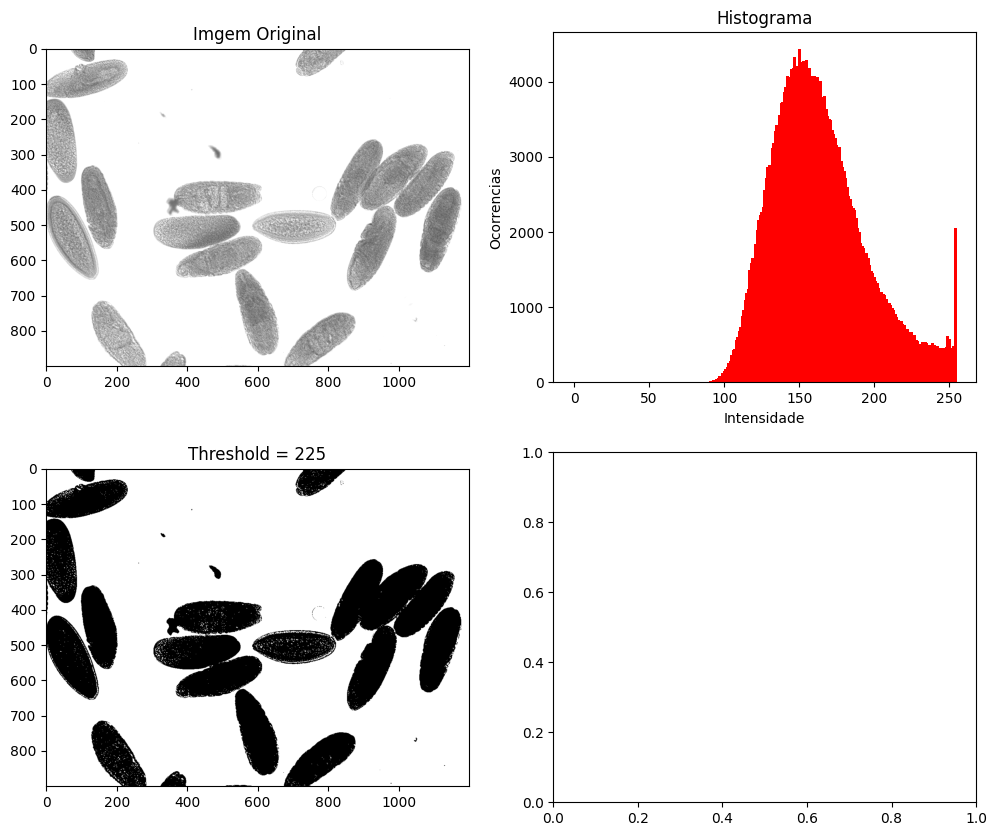

In [47]:
img1 = cv2.imread("img/insitu107595.jpg", cv2.IMREAD_GRAYSCALE)
imgHist = np.histogram(img1, bins=256, range=(0,255))[0]
imgHistParc = imgHist[:255]
_, imgHistBinary = cv2.threshold(img1, 225, 255, cv2.THRESH_BINARY)

f, axarr = plt.subplots(2,2, figsize = (12,10))
axarr[0,0].imshow(img1, cmap='gray', vmin=0, vmax=255)
axarr[0,0].title.set_text("Imgem Original")
axarr[0,1].bar(np.arange(255), imgHistParc, width=2, bottom=None, align='center', label='Histogram', color='red')
axarr[0,1].title.set_text("Histograma")
axarr[0,1].set_xlabel("Intensidade")
axarr[0,1].set_ylabel("Ocorrencias")
axarr[1,0].imshow(imgHistBinary, cmap='gray', vmin=0, vmax=255)
axarr[1,0].title.set_text("Threshold = 225")

2. Segmentação utilizando a técnica de Threshold Adaptativo (implementar o algortimo). Faça a aplicação do Threshold com e sem suavização prévia

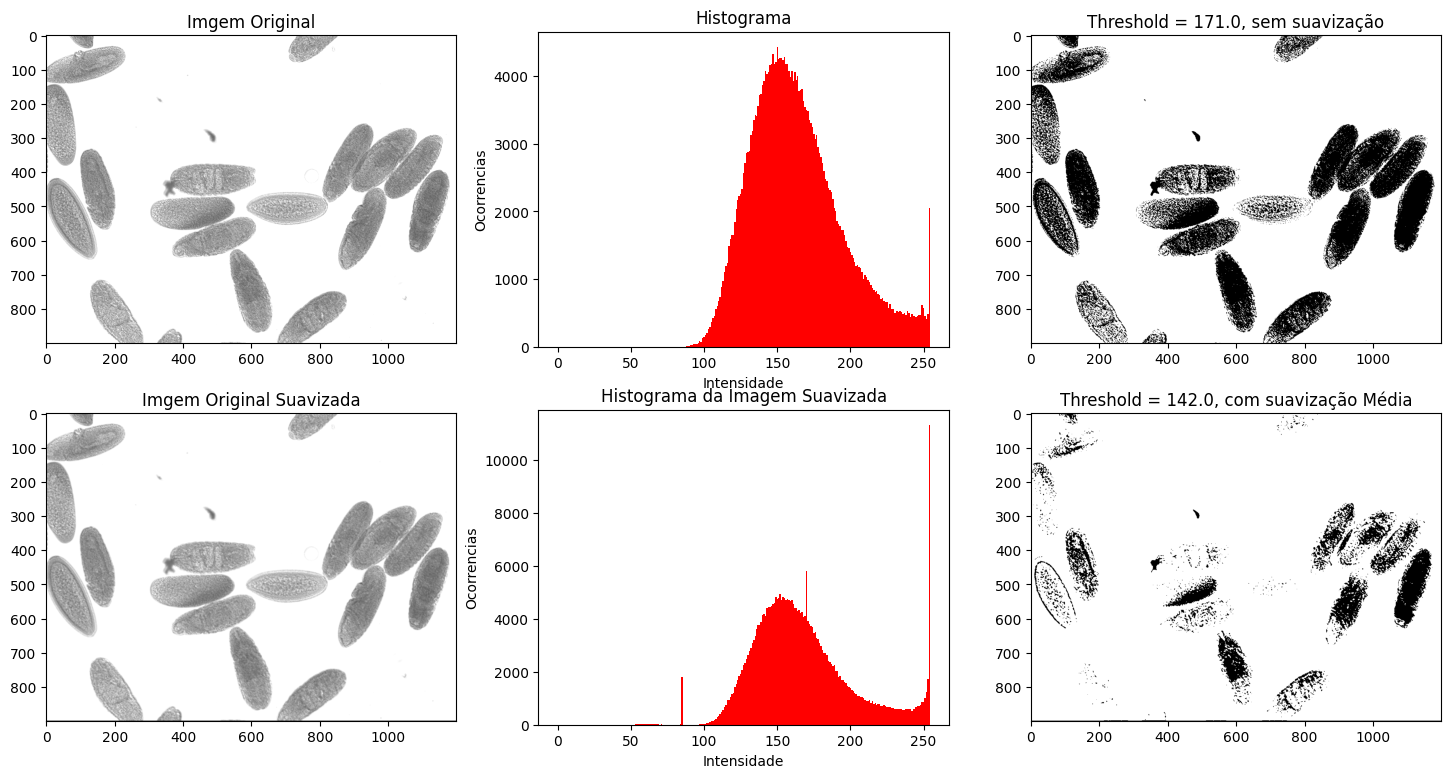

In [46]:
def deltaT (img):
    t = (int(img.max())+int(img.min()))/2
    while True:
        g1 = (t+int(img.min()))/2
        g2 = (int(img.max())+t+1)/2
        t1 = (g1+g2)/2
        if t-t1<=1 and t-t1>=0:
            break
        t=t1
    return t1

def suavMedia(img):
    mediaMask = 3
    imgY, imgX = img.shape
    imgMedia = np.zeros_like(img)

    for i in range(imgY):
        for j in range(imgX):
            mask = img[i:i+mediaMask, j:j+mediaMask]
            imgMedia[i,j] = np.sum(mask)/(mediaMask**2)
    
    return imgMedia

t = deltaT(img1)
imgMedia = suavMedia(img1)
tSuav = deltaT(imgMedia)
imgHistSuav = np.bincount(imgMedia.flatten(), minlength=256)
imgHistSuavParc = imgHistSuav[:255]
_, imgHistBinary = cv2.threshold(img1, t, 255, cv2.THRESH_BINARY)
_, imgHistBinarySuav = cv2.threshold(imgMedia, tSuav, 255, cv2.THRESH_BINARY)

f, axarr = plt.subplots(2,3, figsize = (18,9))
axarr[0,0].imshow(img1, cmap='gray', vmin=0, vmax=255)
axarr[0,0].title.set_text("Imgem Original")
axarr[0,1].bar(np.arange(255), imgHistParc, width=1, bottom=None, align='center', label='Histogram', color='red')
axarr[0,1].title.set_text("Histograma")
axarr[0,1].set_xlabel("Intensidade")
axarr[0,1].set_ylabel("Ocorrencias")
axarr[0,2].imshow(imgHistBinary, cmap='gray', vmin=0, vmax=255)
axarr[0,2].title.set_text("Threshold = "+str(t)+", sem suavização")
axarr[1,0].imshow(imgMedia, cmap='gray', vmin=0, vmax=255)
axarr[1,0].title.set_text("Imgem Original Suavizada")
axarr[1,1].bar(np.arange(255), imgHistSuavParc, width=1, bottom=None, align='center', label='Histogram', color='red')
axarr[1,1].title.set_text("Histograma da Imagem Suavizada")
axarr[1,1].set_xlabel("Intensidade")
axarr[1,1].set_ylabel("Ocorrencias")
axarr[1,2].imshow(imgHistBinarySuav, cmap='gray', vmin=0, vmax=255)
axarr[1,2].title.set_text("Threshold = "+str(tSuav)+", com suavização Média")

3. Segmentação utilizando a técnica de Otsu (implementar) . Faça a aplicação do Threshold com e sem suavização prévia. Mostre um gráfico com o histograma juntamente com a variância entre classes

In [64]:
img2 = cv2.imread("img/HE.jpg", cv2.IMREAD_GRAYSCALE)
img2Hist = np.histogram(img1, bins=256, range=(0,255))[0]
img2HistNorm = img2Hist.copy()
img2HistNorm = img2HistNorm/np.sum(img2HistNorm)
variancia = []

for i in range(0, 255):
        probFundo = np.sum(img2HistNorm[:i])
        probObj = np.sum(img2HistNorm[i:])
        mediaFundo = np.sum(np.arange(i) * img2HistNorm[:i])
        mediaObj = np.sum(np.arange(i, 256) * img2HistNorm[i:])
        print(probFundo)
        print(probObj)
        print(mediaFundo)
        print(mediaObj)

        v = probFundo * probObj * ((mediaFundo / probFundo - mediaObj / probObj) ** 2)
        print(v)
        print("\n")
        variancia.append(v)

print(variancia)

0.0
1.0000000000000002
0.0
228.95235185185186
nan


0.0
1.0
0.0
228.95235185185186
nan


0.0
1.0
0.0
228.95235185185186
nan


0.0
1.0
0.0
228.95235185185186
nan


0.0
1.0
0.0
228.95235185185186
nan


0.0
1.0
0.0
228.95235185185186
nan


0.0
0.9999999999999999
0.0
228.95235185185186
nan


0.0
0.9999999999999999
0.0
228.95235185185186
nan


0.0
1.0000000000000002
0.0
228.95235185185186
nan


0.0
1.0
0.0
228.95235185185186
nan


0.0
1.0
0.0
228.95235185185186
nan


0.0
0.9999999999999999
0.0
228.95235185185186
nan


0.0
1.0
0.0
228.95235185185183
nan


0.0
1.0
0.0
228.95235185185186
nan


0.0
1.0
0.0
228.95235185185186
nan


0.0
1.0
0.0
228.95235185185186
nan


0.0
0.9999999999999999
0.0
228.9523518518519
nan


0.0
1.0
0.0
228.95235185185186
nan


0.0
1.0
0.0
228.95235185185186
nan


0.0
0.9999999999999999
0.0
228.95235185185186
nan


0.0
1.0
0.0
228.95235185185183
nan


0.0
1.0
0.0
228.95235185185186
nan


0.0
1.0
0.0
228.95235185185186
nan


0.0
1.0
0.0
228.95235185185186
nan


0.0
0.99

C:\Users\PelvisThePelvis\AppData\Local\Temp\ipykernel_7964\294776847.py:17: RuntimeWarning: invalid value encountered in scalar divide
  v = probFundo * probObj * ((mediaFundo / probFundo - mediaObj / probObj) ** 2)
